In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
import math
import timeit

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
def read_data(city_name):
    trip_data = pd.read_csv("Project_Data/Combined_Data/"+city_name+".csv", encoding = "ISO-8859-1")
    trip_data["trip_duration"] = pd.to_timedelta(trip_data["trip_duration"])
    trip_data["datetime_start"] = pd.to_datetime(trip_data["datetime_start"])
    trip_data["datetime_end"] = pd.to_datetime(trip_data["datetime_end"])
    trip_data["day"] = pd.to_datetime(trip_data["day"])
    return trip_data

In [ ]:
Duesseldorf_set = read_data("duesseldorf")
Bremen_set = read_data("bremen")
                       
Duesseldorf_set.head(10)
Duesseldorf_set.info()

## Spielen:

In [7]:
def temp_cluster(yLabel):
    plt.figure(figsize = (20,12))
    s1 = plt.scatter(Duesseldorf_set['temp'][Duesseldorf_set['temp'] > 5], Duesseldorf_set[yLabel][Duesseldorf_set['temp'] > 5], marker='x', color='red')
    s2 = plt.scatter(Duesseldorf_set['temp'][Duesseldorf_set['temp'] <= 5], Duesseldorf_set[yLabel][Duesseldorf_set['temp'] <= 5], marker='x', color='blue')
    
    if(yLabel == 'trip_duration_hours'):   
        lineheight = 0.5
    elif(yLabel == 'distance'):
        lineheight = 5

    y = np.zeros(1000)
    x = np.linspace(-2, 37, 1000, endpoint=True)
    
    plt.plot(x, y + lineheight, 'g')
    
    plt.xlabel("Temperature")
    plt.ylabel(yLabel)
    


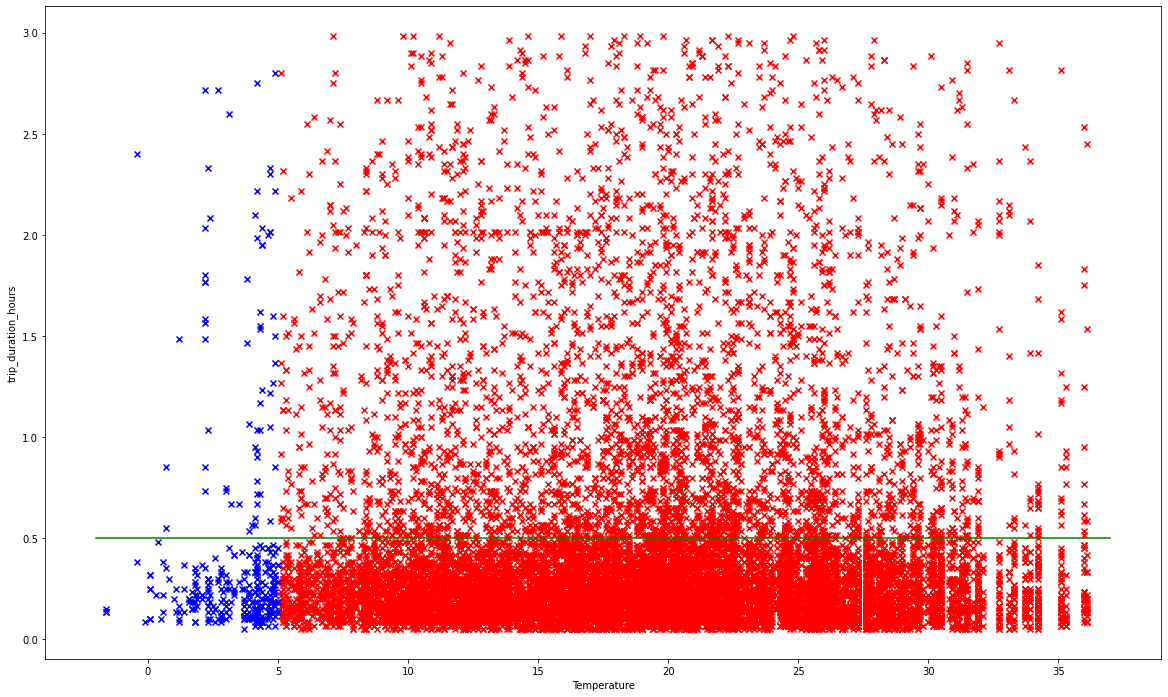

In [8]:
temp_cluster('trip_duration_hours')

In [ ]:
temp_cluster('distance')

In [ ]:
def weekday_cluster(yLabel):
    plt.figure(figsize = (20,12))
    s1 = plt.scatter(Duesseldorf_set['weekday'][Duesseldorf_set['weekday'] > 4], Duesseldorf_set[yLabel][Duesseldorf_set['weekday'] > 4], marker='x', color='red')
    s2 = plt.scatter(Duesseldorf_set['weekday'][Duesseldorf_set['weekday'] <= 4], Duesseldorf_set[yLabel][Duesseldorf_set['weekday'] <= 4], marker='x', color='blue')
    
    if(yLabel == 'trip_duration_hours'):   
        lineheight = 0.5
    elif(yLabel == 'distance'):
        lineheight = 5

    y = np.zeros(1000)
    x = np.linspace(0, 6, 1000, endpoint=True)
    
    plt.plot(x, y + lineheight, 'g')
    
    plt.xlabel("Wochentag")
    plt.ylabel(yLabel)
    


In [ ]:
weekday_cluster('distance')

In [23]:
X = np.array(Duesseldorf_set[['temp','trip_duration_hours']])
Y = Duesseldorf_set['distance'] > 10


from sklearn.preprocessing import StandardScaler

norm = StandardScaler()
X_norm = norm.fit_transform(X)  # simultaneously fit and transform 

In [24]:
print(np.mean(X, axis=0), np.std(X, axis=0))
print(np.mean(X_norm, axis=0),np.std(X_norm, axis=0))  # normalize to 0 mean and unit variance (var=std^2)

[19.1089256   0.45487674] [7.02644129 0.53660585]
[ 5.82993264e-16 -5.35723540e-17] [1. 1.]


In [25]:
from sklearn.svm import LinearSVC # Linear Support Vector Classifier

model_SVM = LinearSVC(loss='hinge')
model_SVM.fit(X_norm, Y)  # Note: There is no need to encode Y. The algorithm does that automatically


LinearSVC(loss='hinge')

In [26]:
def plot_classification_sklearn(model, norm):

    x_range = [0,40]
    y_range = [0,3.5]
    plt.figure(figsize = (10,8))
    # plot classifcation regions
    grid=200
    xx,yy = np.meshgrid(np.linspace(x_range[0], x_range[1], grid),  # create coordinate mesh
                        np.linspace(y_range[0], y_range[1], grid))
    X_ = np.array([np.ravel(xx), np.ravel(yy)]).T
    zz = model.decision_function(norm.transform(X_)).reshape(grid,grid)
    cs = plt.contourf(xx,yy,zz, zz,levels=[-float("inf"),0,float("inf")],alpha=0.2,colors=["b","r"])
    plt.contour(cs, colors='k')
    
    df = Duesseldorf_set;
    #s2 = plt.scatter(df[(df['rain'] == 0.0) & (df['rain'] == 0.0)]["distance"], df[df['rain'] == 0.0]["trip_duration_hours"], marker='+', color='blue')
    
    s1 = plt.scatter(df[(df['orig_lat'] >= 51.0) & (df['orig_lat'] <= 51.4)]["distance"], df[(df['orig_lat'] >= 51.0) & (df['orig_lat'] <= 51.4)]["trip_duration_hours"], marker='+', color='blue')
    s2 = plt.scatter(df[df['orig_lat'] < 51]["distance"], df[df['orig_lat'] <51]["trip_duration_hours"], marker='x', color='red')
    s3 = plt.scatter(df[df['orig_lat'] > 51.4]["distance"], df[df['orig_lat'] > 51.4 ]["trip_duration_hours"], marker='x', color='red')

    plt.plot([51.19], [6.78], 'x', color='green', markeredgewidth=2, markersize=20)
    plt.xlim(x_range)
    plt.ylim(y_range)
    plt.xlabel("distance")
    plt.ylabel("trip_duration_hours")
    plt.legend([s1],['next to main station', 'kalt'])

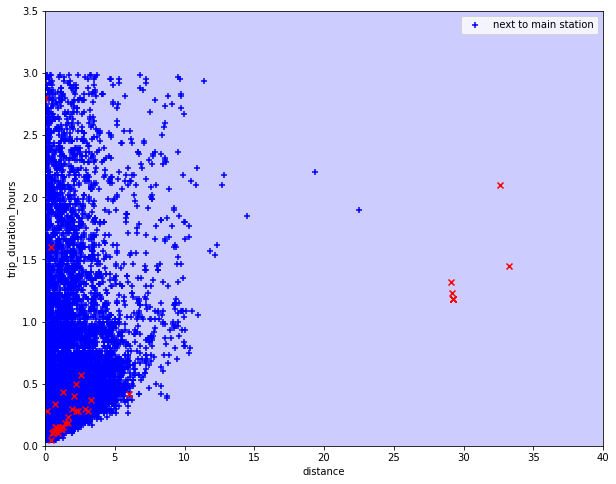

In [27]:
plot_classification_sklearn(model_SVM, norm)

## k-means alg
https://datatofish.com/k-means-clustering-python/

In [28]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [29]:
def k_means_alg(inp1, inp2, n_clusters):
    dataset_array =  np.array(Duesseldorf_set[[inp1,inp2]])

    df = DataFrame(dataset_array,columns=['x','y'])

    kmeans = KMeans(n_clusters).fit(df)
    centroids = kmeans.cluster_centers_
    print(centroids)    
    
    plt.scatter(df['x'], df['y'],c = kmeans.labels_.astype(float), s=50, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
    plt.xlabel(inp1)
    plt.ylabel(inp2)

    plt.show()

[[19.064196    1.73105956]
 [27.61492392  1.67744201]
 [10.23147198  1.73643116]]


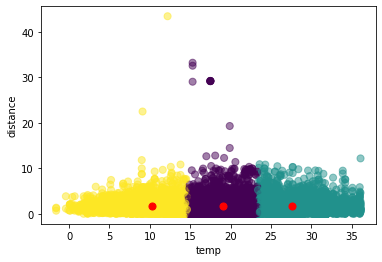

In [30]:
k_means_alg('temp', 'distance', 3)

[[24.45275819  0.45989216]
 [12.96931141  0.44911445]]


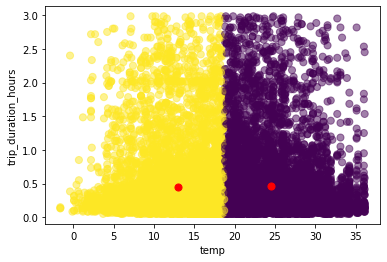

In [31]:
k_means_alg('temp', 'trip_duration_hours', 2)

[[19.1356053   5.70310433]
 [10.31332661  6.13957601]
 [27.65139709  5.52806816]]


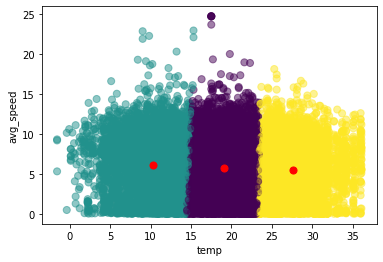

In [32]:
k_means_alg('temp', 'avg_speed', 3)

[[3.92197802 4.63010533]
 [5.66346874 1.3571581 ]
 [2.63193447 1.28395784]]


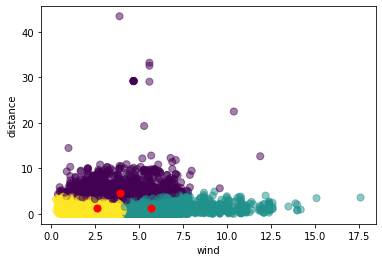

In [33]:
k_means_alg('wind', 'distance', 3)

[[12.77153722  0.51826581]
 [18.33857473  0.39305876]
 [ 6.27383462  0.45373624]]


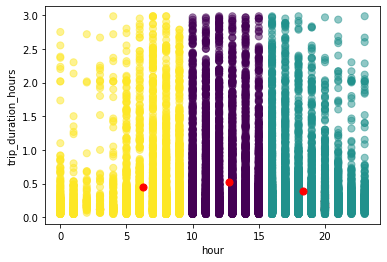

In [34]:
k_means_alg('hour', 'trip_duration_hours', 3)

# WS Simon

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
Duesseldorf_set.head()


In [ ]:
X = Duesseldorf_set.drop(["city", "dest_lat", "dest_lng", "avg_speed","fleetsize_weekly", "fleetsize_monthly", "fleetsize_dayly", "orig_lng","orig_lat", "time", "b_number", "day", "trip_duration", "datetime_start", "datetime_end", "rounded_time_hourly"], axis=1)
y = Duesseldorf_set["weekday"]
X.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# create a df out of array
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_df.head()

In [ ]:
Duesseldorf_set_scaled = X_scaled_df


In [ ]:
sns.pairplot(data=Duesseldorf_set_scaled, hue="weekday")